In [1]:
import pybamm
import matplotlib.pyplot as plt
import numpy as np

In [2]:
parameter_values = pybamm.ParameterValues(chemistry=pybamm.parameter_sets.Mohtat2020)
param = pybamm.LithiumIonParameters()
Cn = parameter_values.evaluate(param.C_n_init)
Cp = parameter_values.evaluate(param.C_p_init)
n_Li_init = parameter_values.evaluate(param.n_Li_particles_init)
c_n_max = parameter_values.evaluate(param.c_n_max)
c_p_max = parameter_values.evaluate(param.c_p_max)
Cn

5.973262521249683

## Initialize model at full charge to 4.1V

In [3]:
parameter_values = pybamm.ParameterValues(chemistry=pybamm.parameter_sets.Chen2020)
parameter_values.update({
    "SEI kinetic rate constant [m.s-1]": 1e-15,
    "SEI resistivity [Ohm.m]": 0,
})
spm = pybamm.lithium_ion.SPM({"SEI": "ec reaction limited"})

In [4]:
esoh_model = pybamm.lithium_ion.ElectrodeSOH()
esoh_sim = pybamm.Simulation(esoh_model, parameter_values=parameter_values)
param = spm.param

Vmin = 2.5
Vmax = 4.2
Cn = parameter_values.evaluate(param.C_n_init)
Cp = parameter_values.evaluate(param.C_p_init)
n_Li_init = parameter_values.evaluate(param.n_Li_particles_init)
c_n_max = parameter_values.evaluate(param.c_n_max)
c_p_max = parameter_values.evaluate(param.c_p_max)

esoh_sol = esoh_sim.solve(
    [0],
    inputs={"V_min": Vmin, "V_max": Vmax, "C_n": Cn, "C_p": Cp, "n_Li": n_Li_init},
)
print(esoh_sol["x_100"].data[0])
print(esoh_sol["y_100"].data[0])

0.9045388808869798
0.26790222708570466


## One cycle

In [5]:
parameter_values.update(
    {
        "Initial concentration in negative electrode [mol.m-3]": esoh_sol["x_100"].data[0] * c_n_max,
        "Initial concentration in positive electrode [mol.m-3]": esoh_sol["y_100"].data[0] * c_p_max,
    }
)
experiment = pybamm.Experiment([
    (f"Discharge at 1C until {Vmin}V",
     "Rest for 1 hour",
     f"Charge at 1C until {Vmax}V", 
     f"Hold at {Vmax}V until C/50")
])
sim = pybamm.Simulation(spm, experiment=experiment, parameter_values=parameter_values)
spm_sol = sim.solve()

In [6]:
spm_sol.plot(["Terminal voltage [V]"])

interactive(children=(FloatSlider(value=0.0, description='t', max=3.614634167152469, step=0.03614634167152469)…

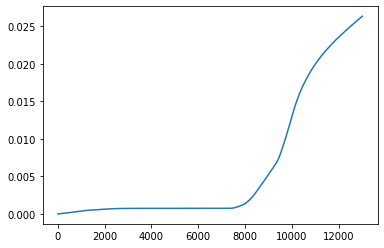

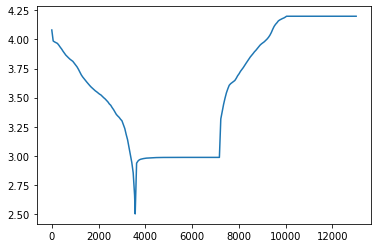

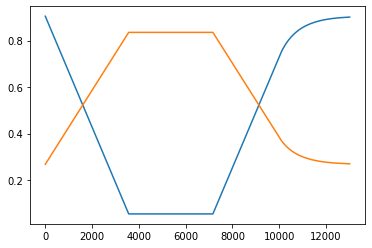

In [7]:
plt.plot(spm_sol["Time [s]"].data, spm_sol["Loss of Lithium Inventory [%]"].data)
plt.figure()
plt.plot(spm_sol["Time [s]"].data, spm_sol["Terminal voltage [V]"].data)
plt.figure()
plt.plot(spm_sol["Time [s]"].data, spm_sol["Negative electrode SOC"].data)
plt.plot(spm_sol["Time [s]"].data, spm_sol["Positive electrode SOC"].data)

In [8]:
lli = spm_sol["Loss of Lithium Inventory [%]"].data
lli_one_cycle = lli[-1] - lli[0]

## 10 cycles

In [10]:
pybamm.set_logging_level("NOTICE")
experiment = pybamm.Experiment([
    (f"Discharge at 1C until {Vmin}V",
     "Rest for 1 hour",
    f"Charge at 1C until {Vmax}V", 
    f"Hold at {Vmax}V until C/50")
] * 183)
sim_100 = pybamm.Simulation(spm, experiment=experiment, parameter_values=parameter_values)
spm_sol_100 = sim_100.solve()

2021-02-25 21:59:33,265 - [NOTICE] simulation.solve(499): Cycle 1/183 (22.193 ms elapsed) --------------------
2021-02-25 21:59:33,266 - [NOTICE] simulation.solve(526): Cycle 1/183, 
2021-02-25 21:59:33,573 - [NOTICE] simulation.solve(526): Cycle 1/183, 
2021-02-25 21:59:33,813 - [NOTICE] simulation.solve(526): Cycle 1/183, 
2021-02-25 21:59:34,060 - [NOTICE] simulation.solve(526): Cycle 1/183, 
2021-02-25 21:59:34,670 - [NOTICE] simulation.solve(499): Cycle 2/183 (1.427 s elapsed) --------------------
2021-02-25 21:59:34,671 - [NOTICE] simulation.solve(526): Cycle 2/183, 
2021-02-25 21:59:34,988 - [NOTICE] simulation.solve(526): Cycle 2/183, 
2021-02-25 21:59:35,224 - [NOTICE] simulation.solve(526): Cycle 2/183, 
2021-02-25 21:59:35,462 - [NOTICE] simulation.solve(526): Cycle 2/183, 
2021-02-25 21:59:35,938 - [NOTICE] simulation.solve(499): Cycle 3/183 (2.695 s elapsed) --------------------
2021-02-25 21:59:35,938 - [NOTICE] simulation.solve(526): Cycle 3/183, 
2021-02-25 21:59:36,212

2021-02-25 21:59:57,874 - [NOTICE] simulation.solve(526): Cycle 21/183, 
2021-02-25 21:59:58,079 - [NOTICE] simulation.solve(526): Cycle 21/183, 
2021-02-25 21:59:58,544 - [NOTICE] simulation.solve(499): Cycle 22/183 (25.300 s elapsed) --------------------
2021-02-25 21:59:58,544 - [NOTICE] simulation.solve(526): Cycle 22/183, 
2021-02-25 21:59:58,790 - [NOTICE] simulation.solve(526): Cycle 22/183, 
2021-02-25 21:59:59,013 - [NOTICE] simulation.solve(526): Cycle 22/183, 
2021-02-25 21:59:59,227 - [NOTICE] simulation.solve(526): Cycle 22/183, 
2021-02-25 21:59:59,629 - [NOTICE] simulation.solve(499): Cycle 23/183 (26.386 s elapsed) --------------------
2021-02-25 21:59:59,630 - [NOTICE] simulation.solve(526): Cycle 23/183, 
2021-02-25 21:59:59,874 - [NOTICE] simulation.solve(526): Cycle 23/183, 
2021-02-25 22:00:00,128 - [NOTICE] simulation.solve(526): Cycle 23/183, 
2021-02-25 22:00:00,352 - [NOTICE] simulation.solve(526): Cycle 23/183, 
2021-02-25 22:00:00,774 - [NOTICE] simulation.so

2021-02-25 22:00:21,212 - [NOTICE] simulation.solve(499): Cycle 42/183 (47.968 s elapsed) --------------------
2021-02-25 22:00:21,213 - [NOTICE] simulation.solve(526): Cycle 42/183, 
2021-02-25 22:00:21,459 - [NOTICE] simulation.solve(526): Cycle 42/183, 
2021-02-25 22:00:21,689 - [NOTICE] simulation.solve(526): Cycle 42/183, 
2021-02-25 22:00:21,888 - [NOTICE] simulation.solve(526): Cycle 42/183, 
2021-02-25 22:00:22,331 - [NOTICE] simulation.solve(499): Cycle 43/183 (49.087 s elapsed) --------------------
2021-02-25 22:00:22,332 - [NOTICE] simulation.solve(526): Cycle 43/183, 
2021-02-25 22:00:22,583 - [NOTICE] simulation.solve(526): Cycle 43/183, 
2021-02-25 22:00:22,822 - [NOTICE] simulation.solve(526): Cycle 43/183, 
2021-02-25 22:00:23,056 - [NOTICE] simulation.solve(526): Cycle 43/183, 
2021-02-25 22:00:23,471 - [NOTICE] simulation.solve(499): Cycle 44/183 (50.227 s elapsed) --------------------
2021-02-25 22:00:23,471 - [NOTICE] simulation.solve(526): Cycle 44/183, 
2021-02-25

2021-02-25 22:00:44,227 - [NOTICE] simulation.solve(526): Cycle 62/183, 
2021-02-25 22:00:44,465 - [NOTICE] simulation.solve(526): Cycle 62/183, 
2021-02-25 22:00:44,689 - [NOTICE] simulation.solve(526): Cycle 62/183, 
2021-02-25 22:00:44,900 - [NOTICE] simulation.solve(526): Cycle 62/183, 
2021-02-25 22:00:45,337 - [NOTICE] simulation.solve(499): Cycle 63/183 (1 minute, 12 seconds elapsed) --------------------
2021-02-25 22:00:45,338 - [NOTICE] simulation.solve(526): Cycle 63/183, 
2021-02-25 22:00:45,578 - [NOTICE] simulation.solve(526): Cycle 63/183, 
2021-02-25 22:00:45,817 - [NOTICE] simulation.solve(526): Cycle 63/183, 
2021-02-25 22:00:46,026 - [NOTICE] simulation.solve(526): Cycle 63/183, 
2021-02-25 22:00:46,529 - [NOTICE] simulation.solve(499): Cycle 64/183 (1 minute, 13 seconds elapsed) --------------------
2021-02-25 22:00:46,530 - [NOTICE] simulation.solve(526): Cycle 64/183, 
2021-02-25 22:00:46,786 - [NOTICE] simulation.solve(526): Cycle 64/183, 
2021-02-25 22:00:47,022 

2021-02-25 22:01:07,878 - [NOTICE] simulation.solve(526): Cycle 82/183, 
2021-02-25 22:01:08,154 - [NOTICE] simulation.solve(526): Cycle 82/183, 
2021-02-25 22:01:08,420 - [NOTICE] simulation.solve(526): Cycle 82/183, 
2021-02-25 22:01:08,653 - [NOTICE] simulation.solve(526): Cycle 82/183, 
2021-02-25 22:01:09,131 - [NOTICE] simulation.solve(499): Cycle 83/183 (1 minute, 36 seconds elapsed) --------------------
2021-02-25 22:01:09,132 - [NOTICE] simulation.solve(526): Cycle 83/183, 
2021-02-25 22:01:09,468 - [NOTICE] simulation.solve(526): Cycle 83/183, 
2021-02-25 22:01:09,729 - [NOTICE] simulation.solve(526): Cycle 83/183, 
2021-02-25 22:01:09,970 - [NOTICE] simulation.solve(526): Cycle 83/183, 
2021-02-25 22:01:10,478 - [NOTICE] simulation.solve(499): Cycle 84/183 (1 minute, 37 seconds elapsed) --------------------
2021-02-25 22:01:10,479 - [NOTICE] simulation.solve(526): Cycle 84/183, 
2021-02-25 22:01:10,772 - [NOTICE] simulation.solve(526): Cycle 84/183, 
2021-02-25 22:01:11,032 

2021-02-25 22:01:32,154 - [NOTICE] simulation.solve(526): Cycle 102/183, 
2021-02-25 22:01:32,403 - [NOTICE] simulation.solve(526): Cycle 102/183, 
2021-02-25 22:01:32,664 - [NOTICE] simulation.solve(526): Cycle 102/183, 
2021-02-25 22:01:32,885 - [NOTICE] simulation.solve(526): Cycle 102/183, 
2021-02-25 22:01:33,358 - [NOTICE] simulation.solve(499): Cycle 103/183 (2 minutes, 0 seconds elapsed) --------------------
2021-02-25 22:01:33,358 - [NOTICE] simulation.solve(526): Cycle 103/183, 
2021-02-25 22:01:33,629 - [NOTICE] simulation.solve(526): Cycle 103/183, 
2021-02-25 22:01:33,916 - [NOTICE] simulation.solve(526): Cycle 103/183, 
2021-02-25 22:01:34,148 - [NOTICE] simulation.solve(526): Cycle 103/183, 
2021-02-25 22:01:34,674 - [NOTICE] simulation.solve(499): Cycle 104/183 (2 minutes, 1 second elapsed) --------------------
2021-02-25 22:01:34,675 - [NOTICE] simulation.solve(526): Cycle 104/183, 
2021-02-25 22:01:34,969 - [NOTICE] simulation.solve(526): Cycle 104/183, 
2021-02-25 22

2021-02-25 22:01:55,349 - [NOTICE] simulation.solve(526): Cycle 121/183, 
2021-02-25 22:01:55,786 - [NOTICE] simulation.solve(499): Cycle 122/183 (2 minutes, 23 seconds elapsed) --------------------
2021-02-25 22:01:55,786 - [NOTICE] simulation.solve(526): Cycle 122/183, 
2021-02-25 22:01:56,031 - [NOTICE] simulation.solve(526): Cycle 122/183, 
2021-02-25 22:01:56,276 - [NOTICE] simulation.solve(526): Cycle 122/183, 
2021-02-25 22:01:56,479 - [NOTICE] simulation.solve(526): Cycle 122/183, 
2021-02-25 22:01:56,900 - [NOTICE] simulation.solve(499): Cycle 123/183 (2 minutes, 24 seconds elapsed) --------------------
2021-02-25 22:01:56,900 - [NOTICE] simulation.solve(526): Cycle 123/183, 
2021-02-25 22:01:57,158 - [NOTICE] simulation.solve(526): Cycle 123/183, 
2021-02-25 22:01:57,393 - [NOTICE] simulation.solve(526): Cycle 123/183, 
2021-02-25 22:01:57,599 - [NOTICE] simulation.solve(526): Cycle 123/183, 
2021-02-25 22:01:58,030 - [NOTICE] simulation.solve(499): Cycle 124/183 (2 minutes, 

2021-02-25 22:02:18,076 - [NOTICE] simulation.solve(526): Cycle 141/183, 
2021-02-25 22:02:18,317 - [NOTICE] simulation.solve(526): Cycle 141/183, 
2021-02-25 22:02:18,557 - [NOTICE] simulation.solve(526): Cycle 141/183, 
2021-02-25 22:02:18,771 - [NOTICE] simulation.solve(526): Cycle 141/183, 
2021-02-25 22:02:19,204 - [NOTICE] simulation.solve(499): Cycle 142/183 (2 minutes, 46 seconds elapsed) --------------------
2021-02-25 22:02:19,205 - [NOTICE] simulation.solve(526): Cycle 142/183, 
2021-02-25 22:02:19,477 - [NOTICE] simulation.solve(526): Cycle 142/183, 
2021-02-25 22:02:19,713 - [NOTICE] simulation.solve(526): Cycle 142/183, 
2021-02-25 22:02:19,929 - [NOTICE] simulation.solve(526): Cycle 142/183, 
2021-02-25 22:02:20,347 - [NOTICE] simulation.solve(499): Cycle 143/183 (2 minutes, 47 seconds elapsed) --------------------
2021-02-25 22:02:20,347 - [NOTICE] simulation.solve(526): Cycle 143/183, 
2021-02-25 22:02:20,590 - [NOTICE] simulation.solve(526): Cycle 143/183, 
2021-02-25

2021-02-25 22:02:41,297 - [NOTICE] simulation.solve(526): Cycle 160/183, 
2021-02-25 22:02:41,720 - [NOTICE] simulation.solve(499): Cycle 161/183 (3 minutes, 8 seconds elapsed) --------------------
2021-02-25 22:02:41,720 - [NOTICE] simulation.solve(526): Cycle 161/183, 
2021-02-25 22:02:41,971 - [NOTICE] simulation.solve(526): Cycle 161/183, 
2021-02-25 22:02:42,229 - [NOTICE] simulation.solve(526): Cycle 161/183, 
2021-02-25 22:02:42,435 - [NOTICE] simulation.solve(526): Cycle 161/183, 
2021-02-25 22:02:42,892 - [NOTICE] simulation.solve(499): Cycle 162/183 (3 minutes, 10 seconds elapsed) --------------------
2021-02-25 22:02:42,892 - [NOTICE] simulation.solve(526): Cycle 162/183, 
2021-02-25 22:02:43,133 - [NOTICE] simulation.solve(526): Cycle 162/183, 
2021-02-25 22:02:43,401 - [NOTICE] simulation.solve(526): Cycle 162/183, 
2021-02-25 22:02:43,633 - [NOTICE] simulation.solve(526): Cycle 162/183, 
2021-02-25 22:02:44,112 - [NOTICE] simulation.solve(499): Cycle 163/183 (3 minutes, 1

2021-02-25 22:03:04,689 - [NOTICE] simulation.solve(526): Cycle 180/183, 
2021-02-25 22:03:04,935 - [NOTICE] simulation.solve(526): Cycle 180/183, 
2021-02-25 22:03:05,193 - [NOTICE] simulation.solve(526): Cycle 180/183, 
2021-02-25 22:03:05,404 - [NOTICE] simulation.solve(526): Cycle 180/183, 
2021-02-25 22:03:05,837 - [NOTICE] simulation.solve(499): Cycle 181/183 (3 minutes, 33 seconds elapsed) --------------------
2021-02-25 22:03:05,837 - [NOTICE] simulation.solve(526): Cycle 181/183, 
2021-02-25 22:03:06,079 - [NOTICE] simulation.solve(526): Cycle 181/183, 
2021-02-25 22:03:06,335 - [NOTICE] simulation.solve(526): Cycle 181/183, 
2021-02-25 22:03:06,555 - [NOTICE] simulation.solve(526): Cycle 181/183, 
2021-02-25 22:03:06,996 - [NOTICE] simulation.solve(499): Cycle 182/183 (3 minutes, 34 seconds elapsed) --------------------
2021-02-25 22:03:06,997 - [NOTICE] simulation.solve(526): Cycle 182/183, 
2021-02-25 22:03:07,259 - [NOTICE] simulation.solve(526): Cycle 182/183, 
2021-02-25

In [11]:
len(spm_sol_100.cycles)

183

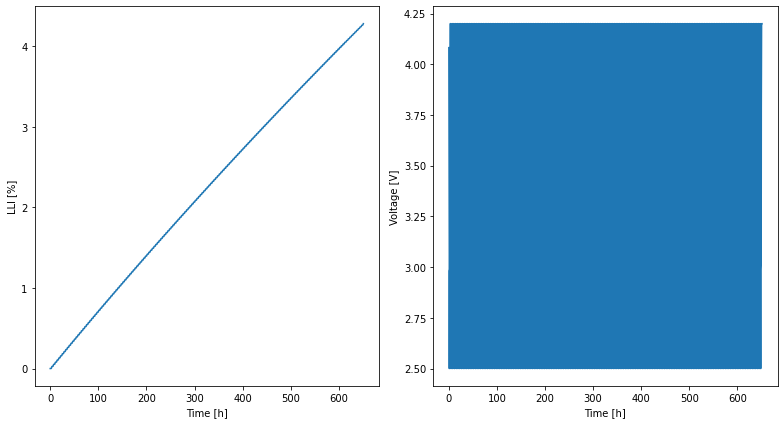

In [12]:
fig, ax = plt.subplots(1,2,figsize=(11,6))

ax[0].plot(spm_sol_100["Time [h]"].data, spm_sol_100["Loss of Lithium Inventory [%]"].data)
ax[0].set_xlabel("Time [h]")
ax[0].set_ylabel("LLI [%]")
ax[1].plot(spm_sol_100["Time [h]"].data, spm_sol_100["Terminal voltage [V]"].data)
ax[1].set_xlabel("Time [h]")
ax[1].set_ylabel("Voltage [V]")

fig.tight_layout()
OUTPUT_DIR = "/Users/vsulzer/Google Drive/PCL_Sulzer/"
fig.savefig(OUTPUT_DIR + "100_cycles.eps", dpi=1000)

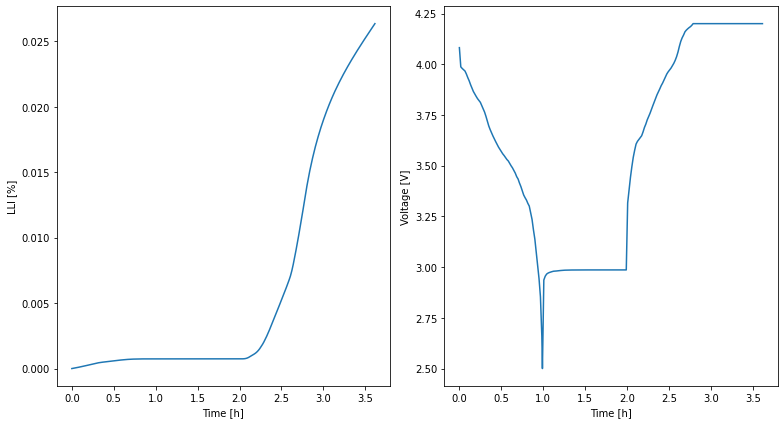

In [13]:
fig, ax = plt.subplots(1,2,figsize=(11,6))

ax[0].plot(spm_sol_100.cycles[0]["Time [h]"].data, spm_sol_100.cycles[0]["Loss of Lithium Inventory [%]"].data)
ax[0].set_xlabel("Time [h]")
ax[0].set_ylabel("LLI [%]")
ax[1].plot(spm_sol_100.cycles[0]["Time [h]"].data, spm_sol_100.cycles[0]["Terminal voltage [V]"].data)
ax[1].set_xlabel("Time [h]")
ax[1].set_ylabel("Voltage [V]")

fig.tight_layout()
fig.savefig(OUTPUT_DIR + "first_cycle.eps", dpi=1000)

In [14]:
lli_100 = spm_sol_100["Loss of Lithium Inventory [%]"].data
lli_100_cycles = lli_100[-1] - lli_100[0]

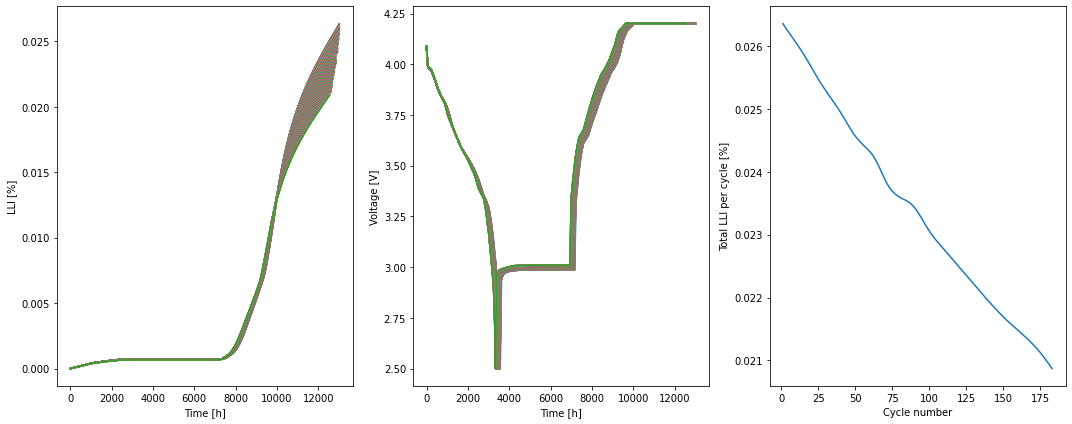

In [15]:

fig, ax = plt.subplots(1,3,figsize=(15,6))

all_lli = []
for cycle in spm_sol_100.cycles:
    t = cycle["Time [s]"].data
    lli = cycle["Loss of Lithium Inventory [%]"].data
    V = cycle["Terminal voltage [V]"].data

    ax[0].plot(t - t[0], lli-lli[0])
    ax[1].plot(t-t[0], V)
    
    all_lli.append(lli[-1]-lli[0])

ax[0].set_xlabel("Time [h]")
ax[0].set_ylabel("LLI [%]")    
ax[1].set_xlabel("Time [h]")
ax[1].set_ylabel("Voltage [V]")

ax[2].plot(range(1, len(all_lli)+1), all_lli)
ax[2].set_xlabel("Cycle number")
ax[2].set_ylabel("Total LLI per cycle [%]")

fig.tight_layout()
fig.savefig(OUTPUT_DIR + "cycles_comparison.eps", dpi=1000)

### eSOH parameters


In [16]:
len(spm_sol_100.summary_variables.items())

71

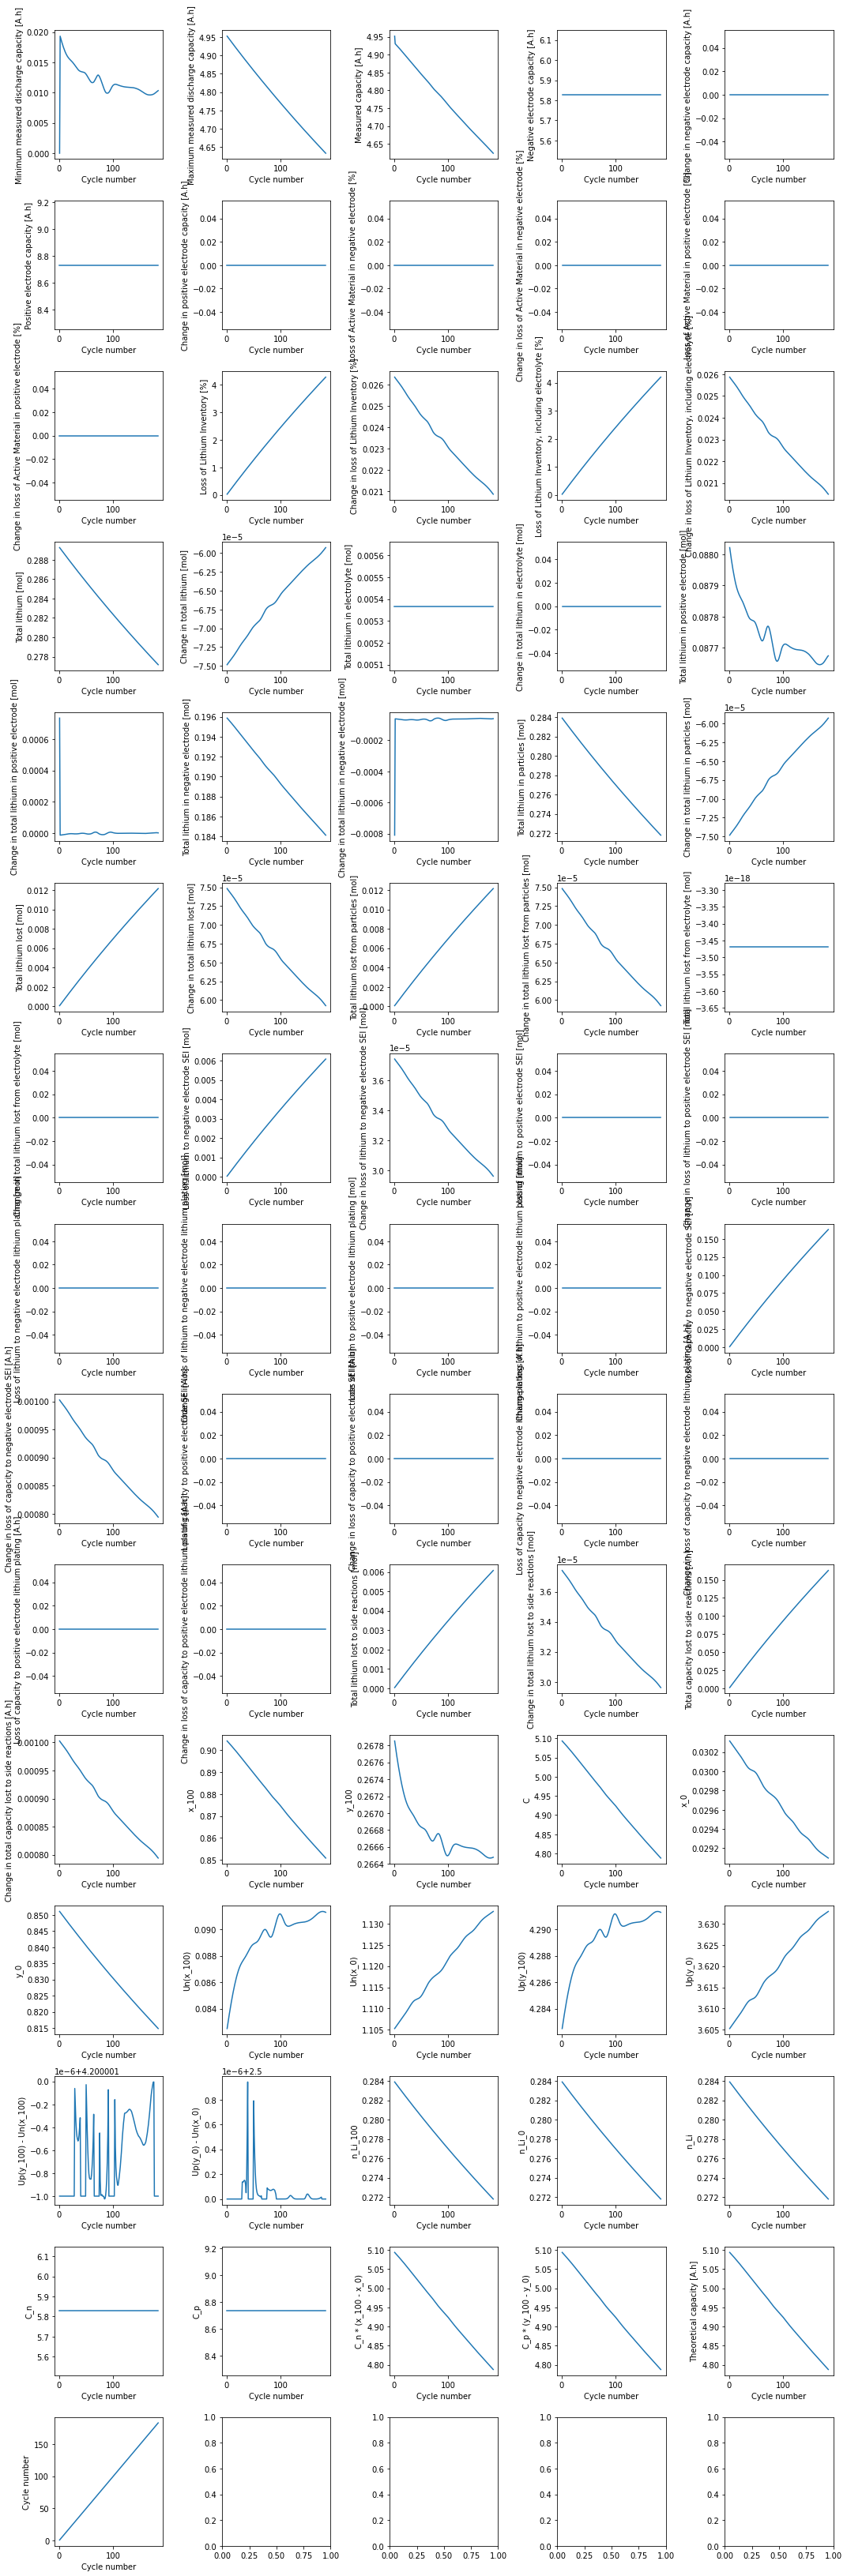

In [17]:
fig, axes = plt.subplots(15,5,figsize=(15,45))

for k, (name,val) in enumerate(spm_sol_100.summary_variables.items()):
    ax = axes.flat[k]
    ax.plot(spm_sol_100.summary_variables["Cycle number"],val)
    ax.set_xlabel("Cycle number")
    ax.set_ylabel(name)

# axes.flat[4].plot(range(1,101), all_nLi)
# axes.flat[4].set_xlabel("Cycle number")
# axes.flat[4].set_ylabel("n_Li")
# axes.flat[-1].plot(range(1,101), all_C)
# axes.flat[-1].set_xlabel("Cycle number")
# axes.flat[-1].set_ylabel("C")
# axes.flat[-1].set_ylim([2,5])
# axes.flat[-2].set_ylim([2,5])

fig.tight_layout()

## Accelerated simulations algorithm

### Constant extrapolation

Solve for 1 cycle

In [18]:
experiment = pybamm.Experiment([
    (f"Discharge at 1C until {Vmin}V",
     "Rest for 1 hour",
     f"Charge at 1C until {Vmax}V", 
     f"Hold at {Vmax}V until C/50")
])
sim = pybamm.Simulation(spm, experiment=experiment, parameter_values=parameter_values)
spm_sol = sim.solve()

2021-02-25 22:03:28,222 - [NOTICE] simulation.solve(499): Cycle 1/1 (23.343 ms elapsed) --------------------
2021-02-25 22:03:28,223 - [NOTICE] simulation.solve(526): Cycle 1/1, 
2021-02-25 22:03:28,536 - [NOTICE] simulation.solve(526): Cycle 1/1, 
2021-02-25 22:03:28,756 - [NOTICE] simulation.solve(526): Cycle 1/1, 
2021-02-25 22:03:28,981 - [NOTICE] simulation.solve(526): Cycle 1/1, 
2021-02-25 22:03:29,511 - [NOTICE] simulation.solve(578): Finish experiment simulation, took 1.312 s


Check how well extrapolating 1 cycle does

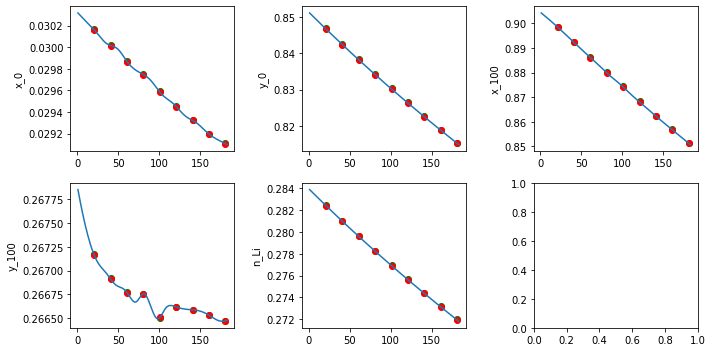

In [35]:
n_cycles_step = 20
cycle = 0

esoh_vars = ["x_0", "y_0", "x_100", "y_100", "n_Li"]

fig, ax = plt.subplots(2,3,figsize=(10,5))
for k, name in enumerate(esoh_vars):
    ax.flat[k].plot(spm_sol_100.summary_variables["Cycle number"], spm_sol_100.summary_variables[name])
    ax.flat[k].set_ylabel(name)

while cycle < len(spm_sol_100.cycles)-n_cycles_step:
    n_Li_cycle = spm_sol_100.cycles[cycle]["Total lithium in particles [mol]"].data
    n_Li_cycle_init = n_Li_cycle[0]
    delta_nLi_cycle = n_Li_cycle[0] - n_Li_cycle[-1]
    
    n_Li = n_Li_cycle_init - delta_nLi_cycle * n_cycles_step

    esoh_sol = esoh_sim.solve(
        [0],
        inputs={"V_min": Vmin, "V_max": Vmax, "C_n": Cn, "C_p": Cp, "n_Li": n_Li},
    )
    esoh_sim.built_model.set_initial_conditions_from(esoh_sol)
    
    cycle += n_cycles_step
    for k, name in enumerate(esoh_vars):
        ax.flat[k].scatter(cycle+1,esoh_sol[name].data[0],color="g")
        ax.flat[k].scatter(cycle+1,spm_sol_100.summary_variables[name][cycle],color="r")
        
fig.tight_layout()

Use extrapolation to initialize next simulation

In [23]:
experiment = pybamm.Experiment([
    (f"Discharge at 1C until {Vmin}V",
     "Rest for 1 hour",
     f"Charge at 1C until {Vmax}V", 
     f"Hold at {Vmax}V until C/50")
])

sim_acc = pybamm.Simulation(spm, experiment=experiment, parameter_values=parameter_values)
sim_acc.build()
sol_acc = []
cycle_nums = []
cycle = 0
while cycle < 183:
    print(cycle)
    # Simulate one cycle
    sol = sim_acc.solve()
    
    n_Li_cycle = sol["Total lithium in particles [mol]"].data
    n_Li_cycle_init = n_Li_cycle[0]
    delta_nLi_cycle = n_Li_cycle[0] - n_Li_cycle[-1]
    
    n_Li = n_Li_cycle_init - delta_nLi_cycle * n_cycles_step

    esoh_sol = esoh_sim.solve(
        [0],
        inputs={"V_min": Vmin, "V_max": Vmax, "C_n": Cn, "C_p": Cp, "n_Li": n_Li},
    )
    esoh_sim.built_model.set_initial_conditions_from(esoh_sol)
    ics = {}
    x_100 = esoh_sol["x_100"].data[0]
    y_100 = esoh_sol["y_100"].data[0]
    for var in sim_acc.built_model.initial_conditions:
        if var.name == "X-averaged negative particle concentration":
            ics[var.name] = x_100 * np.ones((sim_acc.built_model.variables[var.name].size, 2))
        elif var.name == "X-averaged positive particle concentration":
            ics[var.name] = y_100 * np.ones((sim_acc.built_model.variables[var.name].size, 2))
        else:
            ics[var.name] = sim_acc.solution[var.name].data
    sim_acc.built_model.set_initial_conditions_from(ics)

    cycle_nums.append(cycle)
    sol_acc.append(sol)
    cycle += n_cycles_step
        
fig.tight_layout()

2021-02-25 22:22:38,623 - [NOTICE] simulation.solve(499): Cycle 1/1 (22.771 ms elapsed) --------------------
2021-02-25 22:22:38,624 - [NOTICE] simulation.solve(526): Cycle 1/1, 


0


2021-02-25 22:22:38,939 - [NOTICE] simulation.solve(526): Cycle 1/1, 
2021-02-25 22:22:39,187 - [NOTICE] simulation.solve(526): Cycle 1/1, 
2021-02-25 22:22:39,413 - [NOTICE] simulation.solve(526): Cycle 1/1, 
2021-02-25 22:22:39,953 - [NOTICE] simulation.solve(578): Finish experiment simulation, took 1.353 s
2021-02-25 22:22:40,038 - [NOTICE] simulation.solve(499): Cycle 1/1 (29.296 ms elapsed) --------------------
2021-02-25 22:22:40,039 - [NOTICE] simulation.solve(526): Cycle 1/1, 


20


2021-02-25 22:22:40,386 - [NOTICE] simulation.solve(526): Cycle 1/1, 
2021-02-25 22:22:40,636 - [NOTICE] simulation.solve(526): Cycle 1/1, 
2021-02-25 22:22:40,866 - [NOTICE] simulation.solve(526): Cycle 1/1, 
2021-02-25 22:22:41,414 - [NOTICE] simulation.solve(578): Finish experiment simulation, took 1.405 s
2021-02-25 22:22:41,499 - [NOTICE] simulation.solve(499): Cycle 1/1 (27.054 ms elapsed) --------------------
2021-02-25 22:22:41,499 - [NOTICE] simulation.solve(526): Cycle 1/1, 


40


2021-02-25 22:22:41,835 - [NOTICE] simulation.solve(526): Cycle 1/1, 
2021-02-25 22:22:42,110 - [NOTICE] simulation.solve(526): Cycle 1/1, 
2021-02-25 22:22:42,337 - [NOTICE] simulation.solve(526): Cycle 1/1, 
2021-02-25 22:22:42,841 - [NOTICE] simulation.solve(578): Finish experiment simulation, took 1.370 s
2021-02-25 22:22:42,922 - [NOTICE] simulation.solve(499): Cycle 1/1 (26.844 ms elapsed) --------------------
2021-02-25 22:22:42,922 - [NOTICE] simulation.solve(526): Cycle 1/1, 


60


2021-02-25 22:22:43,224 - [NOTICE] simulation.solve(526): Cycle 1/1, 
2021-02-25 22:22:43,489 - [NOTICE] simulation.solve(526): Cycle 1/1, 
2021-02-25 22:22:43,726 - [NOTICE] simulation.solve(526): Cycle 1/1, 
2021-02-25 22:22:44,208 - [NOTICE] simulation.solve(578): Finish experiment simulation, took 1.313 s
2021-02-25 22:22:44,291 - [NOTICE] simulation.solve(499): Cycle 1/1 (25.774 ms elapsed) --------------------
2021-02-25 22:22:44,292 - [NOTICE] simulation.solve(526): Cycle 1/1, 


80


2021-02-25 22:22:44,586 - [NOTICE] simulation.solve(526): Cycle 1/1, 
2021-02-25 22:22:44,838 - [NOTICE] simulation.solve(526): Cycle 1/1, 
2021-02-25 22:22:45,056 - [NOTICE] simulation.solve(526): Cycle 1/1, 
2021-02-25 22:22:45,540 - [NOTICE] simulation.solve(578): Finish experiment simulation, took 1.275 s
2021-02-25 22:22:45,626 - [NOTICE] simulation.solve(499): Cycle 1/1 (26.334 ms elapsed) --------------------
2021-02-25 22:22:45,627 - [NOTICE] simulation.solve(526): Cycle 1/1, 


100


2021-02-25 22:22:45,946 - [NOTICE] simulation.solve(526): Cycle 1/1, 
2021-02-25 22:22:46,181 - [NOTICE] simulation.solve(526): Cycle 1/1, 
2021-02-25 22:22:46,429 - [NOTICE] simulation.solve(526): Cycle 1/1, 
2021-02-25 22:22:46,977 - [NOTICE] simulation.solve(578): Finish experiment simulation, took 1.377 s
2021-02-25 22:22:47,057 - [NOTICE] simulation.solve(499): Cycle 1/1 (25.418 ms elapsed) --------------------
2021-02-25 22:22:47,058 - [NOTICE] simulation.solve(526): Cycle 1/1, 


120


2021-02-25 22:22:47,424 - [NOTICE] simulation.solve(526): Cycle 1/1, 
2021-02-25 22:22:47,684 - [NOTICE] simulation.solve(526): Cycle 1/1, 
2021-02-25 22:22:47,933 - [NOTICE] simulation.solve(526): Cycle 1/1, 
2021-02-25 22:22:48,429 - [NOTICE] simulation.solve(578): Finish experiment simulation, took 1.397 s
2021-02-25 22:22:48,518 - [NOTICE] simulation.solve(499): Cycle 1/1 (27.636 ms elapsed) --------------------
2021-02-25 22:22:48,519 - [NOTICE] simulation.solve(526): Cycle 1/1, 


140


2021-02-25 22:22:48,818 - [NOTICE] simulation.solve(526): Cycle 1/1, 
2021-02-25 22:22:49,056 - [NOTICE] simulation.solve(526): Cycle 1/1, 
2021-02-25 22:22:49,275 - [NOTICE] simulation.solve(526): Cycle 1/1, 
2021-02-25 22:22:49,786 - [NOTICE] simulation.solve(578): Finish experiment simulation, took 1.295 s
2021-02-25 22:22:49,869 - [NOTICE] simulation.solve(499): Cycle 1/1 (26.835 ms elapsed) --------------------
2021-02-25 22:22:49,870 - [NOTICE] simulation.solve(526): Cycle 1/1, 


160


2021-02-25 22:22:50,154 - [NOTICE] simulation.solve(526): Cycle 1/1, 
2021-02-25 22:22:50,404 - [NOTICE] simulation.solve(526): Cycle 1/1, 
2021-02-25 22:22:50,610 - [NOTICE] simulation.solve(526): Cycle 1/1, 
2021-02-25 22:22:51,110 - [NOTICE] simulation.solve(578): Finish experiment simulation, took 1.267 s
2021-02-25 22:22:51,203 - [NOTICE] simulation.solve(499): Cycle 1/1 (30.406 ms elapsed) --------------------
2021-02-25 22:22:51,204 - [NOTICE] simulation.solve(526): Cycle 1/1, 


180


2021-02-25 22:22:51,498 - [NOTICE] simulation.solve(526): Cycle 1/1, 
2021-02-25 22:22:51,742 - [NOTICE] simulation.solve(526): Cycle 1/1, 
2021-02-25 22:22:51,947 - [NOTICE] simulation.solve(526): Cycle 1/1, 
2021-02-25 22:22:52,525 - [NOTICE] simulation.solve(578): Finish experiment simulation, took 1.352 s


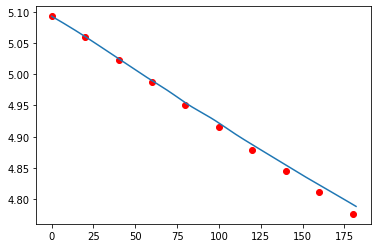

In [24]:
n_Li_acc = [sol.summary_variables["C"] for sol in sol_acc]

fig, ax = plt.subplots()
ax.plot(cycle_nums, n_Li_acc, "ro")
ax.plot(spm_sol_100.summary_variables["C"])
# for k, sol in enumerate(sol_acc):
#     print(sol.summary_variables["n_Li"])
#     print(spm_sol_100.summary_variables["n_Li"][k * n_cycles_step])

2021-02-25 22:29:21,850 - [WARNING] backend_ps._is_transparent(734): The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
2021-02-25 22:29:21,851 - [WARNING] backend_ps._is_transparent(734): The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


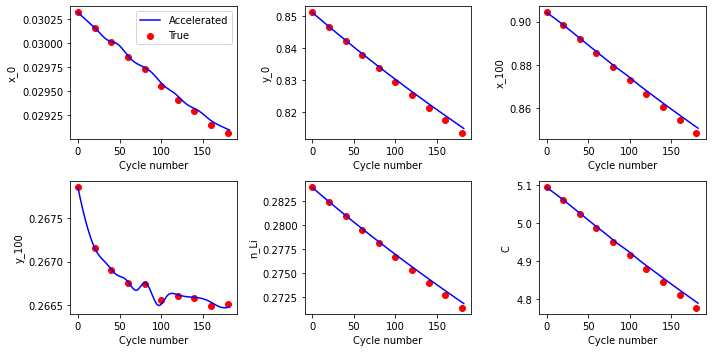

In [38]:
n_Li_acc = [sol.summary_variables["C"] for sol in sol_acc]
esoh_vars = ["x_0", "y_0", "x_100", "y_100", "n_Li", "C"]

fig, axes = plt.subplots(2,3,figsize=(10,5))
for k, name in enumerate(esoh_vars):
    ax = axes.flat[k]
    ax.scatter(cycle_nums,[sol.summary_variables[name] for sol in sol_acc],color="r")
    ax.plot(spm_sol_100.summary_variables[name],"b-")
    ax.set_ylabel(name)
    ax.set_xlabel("Cycle number")
    
axes.flat[0].legend(["Accelerated", "True"])
fig.tight_layout()
fig.savefig(OUTPUT_DIR + "accelerated_sims.eps", dpi=1000)